In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

class Label:
    def __init__(self, idx, tag, color):
       '''
       id : index of occurrence
       tag: the corresponding textual tag,
       color: the color for the graphical representation later on
       '''
       self.idx = idx
       self.tag = tag
       self.color = color

    def get_idx(self):
           return self.idx
    def get_tag(self):
           return self.tag
    def get_color(self):
           return self.color

def create_x_coords_from_lbls(lbls, colors ):
    dict_color_coords_x = {}# we store here for each color(lbl) the coordinates

    for color in colors:
        dict_color_coords_x[color] = []

    for lbl in lbls:
        idx = lbl.get_idx()
        tag = lbl.get_tag()
        color = lbl.get_color()
        x_coord = (idx, 1)
        dict_color_coords_x[color].append(x_coord)


    return dict_color_coords_x

def visualize_differences_annotations(annot_1, annot_2, color_map_labels, export_filepath = None):

    length_annotations = len(annot_1)

    clr_map_differences = {"TT":"white", "NN":"black"}

    differences_list = ["TT" if lbl == annot_1[idx] else "NN" for idx, lbl in enumerate(annot_2)]

    A_as_lbl_objs = [Label(idx, annot, color_map_labels.get(annot) ) for idx, annot in enumerate(annot_1)]
    B_as_lbl_objs = [Label(idx, annot, color_map_labels.get(annot) ) for idx, annot in enumerate(annot_2)]
    C_as_lbl_objs = [Label(idx, annot, clr_map_differences.get(annot) ) for idx, annot in enumerate(differences_list)]

    colors = list(color_map_labels.values())
    colors_unequal = list(clr_map_differences.values())

    annot_A_colors_xs_dict = create_x_coords_from_lbls(A_as_lbl_objs, colors)
    y_coord = (0,1)

    annot_B_colors_xs_dict = create_x_coords_from_lbls(B_as_lbl_objs, colors)

    annot_C_colors_xs_dict = create_x_coords_from_lbls(C_as_lbl_objs, colors_unequal)

    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.set_size_inches(12, 8)
    fig.suptitle('Annotation differences')


    for key, value in annot_A_colors_xs_dict.items():
        axs[0].broken_barh(value, y_coord, facecolors =key)

    for key, value in annot_B_colors_xs_dict.items():
        axs[2].broken_barh(value, y_coord, facecolors =key)

    for key, value in annot_C_colors_xs_dict.items():
        axs[1].broken_barh(value, y_coord, facecolors =key)


    axs[0].set_xlim([0, length_annotations])
    axs[0].set_ylabel("Annotator A")
    axs[0].set_yticks([])
    axs[0].margins(x=0,y=0)

    axs[1].set_yticks([])
    axs[1].set_ylabel("A!=B")

    x_ticks_timeline = [i for i in range(length_annotations)]

    axs[2].set_xlim([0, length_annotations])
    axs[2].set_yticks([])
    axs[2].set_xticks(x_ticks_timeline)# if no ticks use set_xticks([])
    axs[2].set_ylabel("Annotator B")

    #legend:
    color_patches = [ mpatches.Patch(color=value, label = key) for key,value in color_map_labels.items() ]

    axs[0].legend(handles=color_patches,loc="upper left", bbox_to_anchor=(1,1))
    plt.subplots_adjust(wspace=0, hspace=0.00)
    plt.margins(x=0, y=0)

    if export_filepath:
       plt.savefig(export_filepath)
    else:
       plt.show()


def percent_agreement(ann_a, ann_b):
    counts_agreed = 0
    counts_total = len(ann_a)
    for i in range(counts_total):
       if ann_a[i] == ann_b[i]:
          counts_agreed +=1
    if counts_agreed == 0:
       return 0
    else:
       return (counts_agreed / counts_total)*100

# Measuring and visualizing Interrater Agreement

## Cohen's Kappa

An implementation of the Cohen's Kappa score is provided in the python package scikit-learn.

In [ ]:
from sklearn.metrics import cohen_kappa_score

ann_A = ["take","take","take","take","wait","wait","wait","put","put","walk","walk","walk", "sit", "sit","sit","sit","sit"]
ann_B  = ["take","take","take","wait","wait","wait","wait","wait","put","walk","walk","sit", "sit", "sit", "sit", "wait", "wait"]

print(cohen_kappa_score(ann_A, ann_B))


0.6271929824561404


###Example from slides

Let's use the example from the slides and compare the Cohen's kappa score and the percentage agreement score.

In [ ]:
ANNOT_1 = ["c","c","c","d","d","d","d","d"]
ANNOT_2 = ["c","c", "d", "c", "c","d","d","d"]

print(cohen_kappa_score(ANNOT_1, ANNOT_2))


0.25


What is the score compared to percent agreement?

In [ ]:
print(percent_agreement(ANNOT_1, ANNOT_2))

62.5


**More** extreme example: very high percent agreement, very low k

In [ ]:
ANNOT_1 = ["c","c","c","c","c","c","c","d"]
ANNOT_2 = ["c","c","c","c","c","c","c","c"]

print(cohen_kappa_score(ANNOT_1, ANNOT_2))
print(percent_agreement(ANNOT_1, ANNOT_2))

0.0
87.5


## Bland-Altman plot

In [ ]:
import pandas as pd

# Let's imagine that the annotation task is about counting how many particular objects (let's say cars) are visualized in a picture
# The annotators have to type in only the number of this particular objects
# Below are given the annotations of 10 images
df = pd.DataFrame({'A': [2, 5, 7, 10, 21, 22, 30 ],
                   'B': [2, 3, 9, 10, 20, 15, 25 ]})

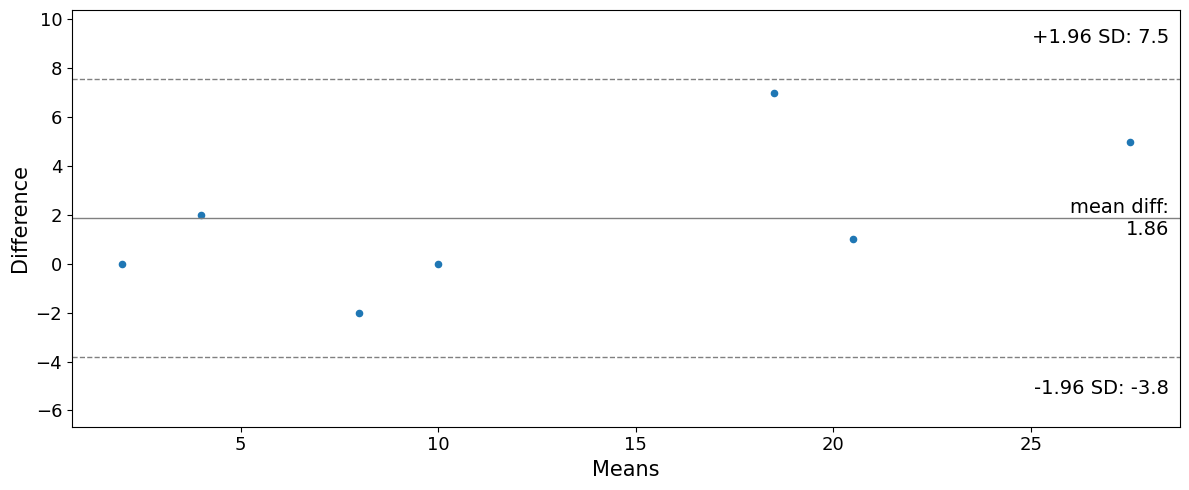

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Bland-Altman plot
f, ax = plt.subplots(1, figsize = (12, 5))
sm.graphics.mean_diff_plot(df.A, df.B, ax = ax)

#display Bland-Altman plot
plt.show()

In [ ]:
# there is also a library called pyCompare https://github.com/jaketmp/pyCompare
# It offers an implementation of such plots as well

In [ ]:
!pip install pyCompare

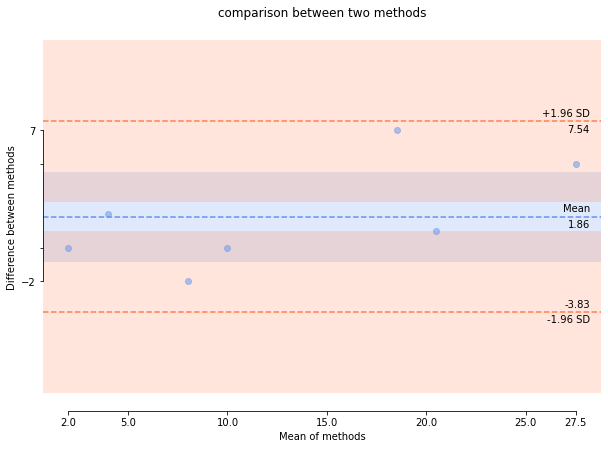

In [ ]:
import pyCompare
pyCompare.blandAltman(df.A, df.B, title = "comparison between two methods")

In [ ]:
display(df)

,A,B
0,2,2
1,5,3
2,7,9
3,10,10
4,21,20
5,22,15
6,30,25


## Visualizing sequential annotations

In [ ]:
ann_A = ["take","take","take","take","wait","wait","wait","put","put","walk","walk","walk", "sit", "sit"]
ann_B  = ["take","take","take","wait","wait","wait","wait","wait","put","walk","walk","sit", "sit", "sit"]
lbl_colors_map = {"take":"green", "wait":"coral", "walk":"blue", "sit":"yellow", "put":"purple"}

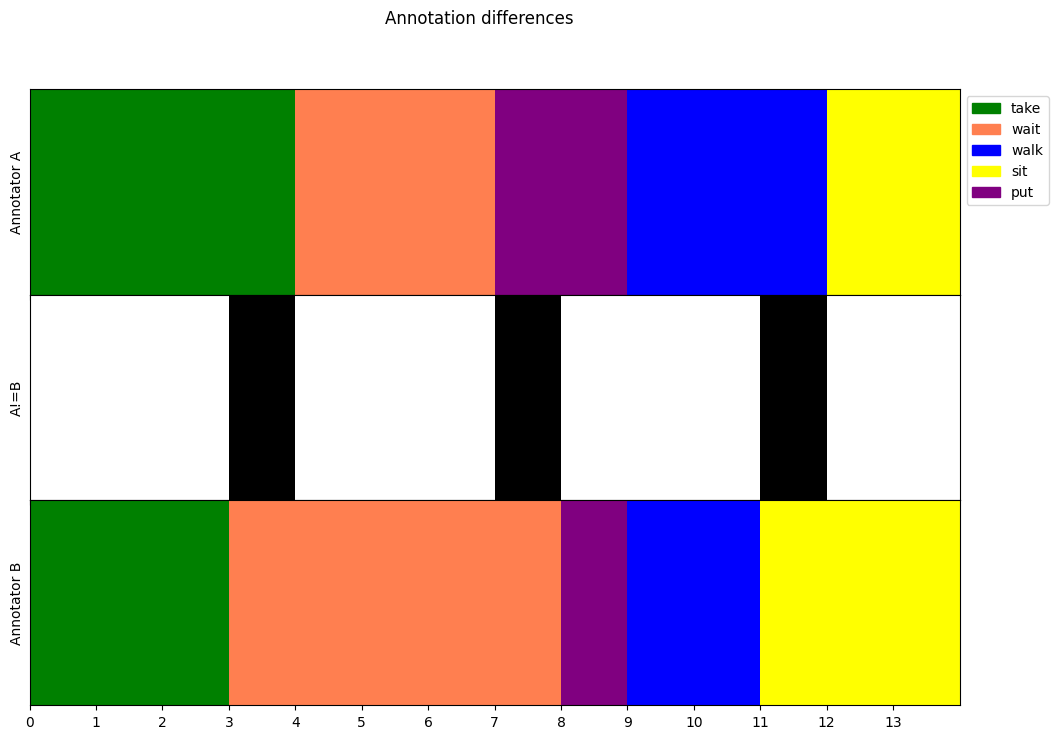

In [ ]:
visualize_differences_annotations(ann_A, ann_B, lbl_colors_map)